# Squirrels in Central park

For this exercise, we will test a hypothesis about the proportion of squirrels in Central Park. We'll use data from the [NYC data portal](https://data.cityofnewyork.us/Environment/2018-Central-Park-Squirrel-Census-Squirrel-Data/vfnx-vebw) that records info about squirrels found in the park during the last census.

In [1]:
# Import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### What do you think the proportion of gray squirrels should be?
Define this value before we look at the data.

H<sub>0</sub>: The expected proportion of gray squirrels is ___

In [2]:
expected_proportion = 0.5

### Pandas for data import
We will use the pandas [pandas](https://pandas.pydata.org/) package to help with data import and cleaning. Pandas is especially good for handlind data as data frames. 

In [3]:
# Import data
squirrels_data = pd.read_csv('data/2018_Central_Park_Squirrel_Census_-_Squirrel_Data.csv')
squirrels_data.head()

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,NaN,...,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086),NaN,19,4,19,13
1,-73.957044,40.794851,37E-PM-1006-03,37E,PM,10062018,3,Adult,Gray,Cinnamon,...,False,False,True,me,POINT (-73.9570437717691 40.794850940803904),NaN,19,4,19,13
2,-73.976831,40.766718,2E-AM-1010-03,02E,AM,10102018,3,Adult,Cinnamon,NaN,...,False,True,False,NaN,POINT (-73.9768311751004 40.76671780725581),NaN,19,4,19,13
3,-73.975725,40.769703,5D-PM-1018-05,05D,PM,10182018,5,Juvenile,Gray,NaN,...,False,False,True,NaN,POINT (-73.9757249834141 40.7697032606755),NaN,19,4,19,13
4,-73.959313,40.797533,39B-AM-1018-01,39B,AM,10182018,1,NaN,NaN,NaN,...,False,False,False,NaN,POINT (-73.9593126695714 40.797533370163),NaN,19,4,19,13


In [4]:
# For the purpose of this exercise, we only care about squirrels who's fur color was reported as 'Cinnamon' or 'Gray'
squirrels_data_cinnamon = squirrels_data.loc[squirrels_data['Primary Fur Color']  == 'Cinnamon']
squirrels_data_gray = squirrels_data.loc[squirrels_data['Primary Fur Color']  == 'Gray']

n_cinnamon_squirrels = squirrels_data_cinnamon['Primary Fur Color'].value_counts()[0]
n_gray_squirrels = squirrels_data_gray['Primary Fur Color'].value_counts()[0]
n_squirrels = n_cinnamon_squirrels + n_gray_squirrels

print(f'The total number of squirrels sampled was {n_squirrels}')


The total number of squirrels sampled was 2865


### Before looking at the actual proportion of squirrels...
we should generate our null distribution based on our `expected_proportion`. To do this, we will assume random process of seeing a gray vs. cinnamon squirrel is like flipping a coin where the coin is weighted by `expected_proportion`. In other words, the probability of the coin being heads is `expected_proportion`. In each of 10,000 replicates, we will simulate sampling `n_squirrels` squirrels and record the number of gray squirrels seen in these trials.

In [5]:
# Compute a null distrubtion assuming we flip a coin n_squirrels times. With probability 0.5 we obesrve a gray
# squirrel and with probability 0.5 we see a cinnammon squirrel. What would this distribution look like?

# We could compute the proportion but to exemplify simulations, we will instead run 10,000 trials of the above
# coin flip experiment.

replicates = range(10000)
null_proportions = np.zeros((len(replicates)))
squirrels = range(n_squirrels)

for rep in replicates:
    
    # Flip a coin n_squirrels times and count successes = number of gray squirrels seen
    n_successes = 0
    
    for squirrel in squirrels:
        
        rand_float = np.random.random()
        
        if rand_float < expected_proportion:
            n_successes += 1   # add 1 to our number of successes
            
        # Done with this squirrel
        
    
    # Done with this replicate
    
    # Record n_success in our vector
    null_proportions[rep] = n_successes/n_squirrels
    if rep % 1000 == 0:
        print(f'Finished {rep} replicates')
    

print('Done with all experiments')
        
        

Finished 0 replicates
Finished 1000 replicates
Finished 2000 replicates
Finished 3000 replicates
Finished 4000 replicates
Finished 5000 replicates
Finished 6000 replicates
Finished 7000 replicates
Finished 8000 replicates
Finished 9000 replicates
Done with all experiments


In [6]:
# Plot the null distribution

null_proportions_df = pd.DataFrame({'Gray_observed': null_proportions})
null_proportions_df.head()

,Gray_observed
0,0.493543
1,0.507504
2,0.505410
3,0.519721
4,0.490052


Text(0.5, 1.0, 'Null distribution assuming proportion = 0.5')

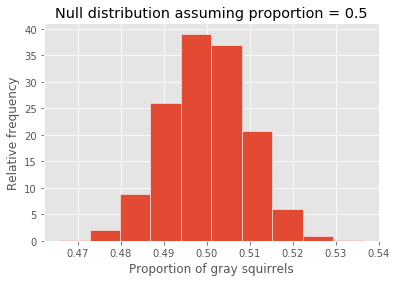

In [7]:
plt.style.use('ggplot')
null_proportions_df.hist(density = True, edgecolor = 'w')
plt.xlabel('Proportion of gray squirrels')
plt.ylabel('Relative frequency')
plt.title(f'Null distribution assuming proportion = {expected_proportion}')

### How did we do?

Now let's plot the null distribution histogram but also the actual observed number of gray squirrels from the census data.

The number of cinnamon squirrels found was 392
The number of gray squirrels found was 2473
The proportion of gray squirrels observed in the data was 0.8631762652705061


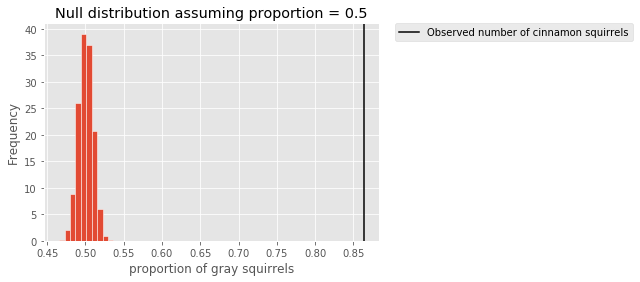

In [9]:
print(f'The number of cinnamon squirrels found was {n_cinnamon_squirrels}')
print(f'The number of gray squirrels found was {n_gray_squirrels}')

observed_proportion = n_gray_squirrels/n_squirrels
print(f'The proportion of gray squirrels observed in the data was {observed_proportion}')


plt.style.use('ggplot')
null_proportions_df.hist(density = True, edgecolor = 'w')
plt.axvline([observed_proportion], label = 'Observed number of cinnamon squirrels', color = 'k')
plt.xlabel('proportion of gray squirrels')
plt.ylabel('Frequency')
plt.title(f'Null distribution assuming proportion = {expected_proportion}')
lgd = plt.legend(loc=2, bbox_to_anchor=(1.05,1), borderaxespad = 0.0)


### Testing significance

Is our observed proportion of gray squirrels in the data significantly more extreme than we would expect given our null model? 

As the final step of our calculations, we will compute the P-value explicitly from our null distribution.

In [10]:

def compute_p_value_onesample(test_statistic, null_data, direction):
        # direction = 'less' or 'greater'. If 'less', we count number of values <= the test statistic,
        # if direction = 'greater', we count the number of values >= test statistic
        more_extreme_values = []
        
        if (direction == 'less'):
            for data_point in null_data:
                if (data_point <= test_statistic):
                    more_extreme_values.append(data_point)
        else:
            for data_point in null_data:
                if (data_point >= test_statistic):
                    more_extreme_values.append(data_point)
                    
        n_null_values = len(null_data)
        n_more_extreme_values = len(more_extreme_values)
        print(f'Of the {n_null_values} null values, {n_more_extreme_values} were more extreme than our test statistic of {test_statistic}.')
        
        p_value_one_sided = n_more_extreme_values/n_null_values
        p_value_two_sided = 2.0 * p_value_one_sided
        
        return p_value_one_sided, p_value_two_sided

    
# If the observed proportion is greater than the expected proportion, direction = 'greater'. If the observed
# proportion is less than the expected proportion, then direction = 'less'.
p1, p2 = compute_p_value_onesample(observed_proportion, null_proportions, 'greater')
                
        
print(f'The one-sided P-value is {p1}')
print(f'The two-sided P-value is {p2}')


Of the 10000 null values, 0 were more extreme than our test statistic of 0.8631762652705061.
The one-sided P-value is 0.0
The two-sided P-value is 0.0
